In [14]:
import pickle

### Load AVERITEC Data
with open("benchmarking/AVERITEC/results4.pkl", "rb") as f:
    AVERITEC = pickle.load(f)[1]
    
with open("benchmarking/AVERITEC/results2.pkl", "rb") as f:
    AVERITEC2 = pickle.load(f)[1]
    
AVERITEC[0]['name'] = 'FactCheck-4';
AVERITEC[1]['name'] = 'FactCheck-4-Mini';
AVERITEC[2]['name'] = 'Llama3';
AVERITEC[3]['name'] = 'Llama3-Mini';

AVERITEC2[0]['name'] = 'FactCheck-2';
AVERITEC2[1]['name'] = 'FactCheck-2-Mini';

AVERITEC.insert(2, AVERITEC2[0])
AVERITEC.insert(3, AVERITEC2[1])
                             
                             
### Load FEVER Data
with open("benchmarking/FEVER/results4.pkl", "rb") as f:
    FEVER = pickle.load(f)[1]
    
with open("benchmarking/FEVER/results2.pkl", "rb") as f:
    FEVER2 = pickle.load(f)[1]
    
FEVER[0]['name'] = 'FactCheck-4';
FEVER[1]['name'] = 'FactCheck-4-Mini';
FEVER[2]['name'] = 'Llama3';
FEVER[3]['name'] = 'Llama3-Mini';

FEVER2[0]['name'] = 'FactCheck-2';
FEVER2[1]['name'] = 'FactCheck-2-Mini';

FEVER.insert(2, FEVER2[0])
FEVER.insert(3, FEVER2[1])


### Load Politifact Data
with open("benchmarking/politifact/results4.pkl", "rb") as f:
    POLITIFACT = pickle.load(f)[1]
    
with open("benchmarking/politifact/results2.pkl", "rb") as f:
    POLITIFACT2 = pickle.load(f)[1]
    
POLITIFACT[0]['name'] = 'FactCheck-4';
POLITIFACT[1]['name'] = 'FactCheck-4-Mini';
POLITIFACT[2]['name'] = 'Llama3';
POLITIFACT[3]['name'] = 'Llama3-Mini';

POLITIFACT2[0]['name'] = 'FactCheck-2';
POLITIFACT2[1]['name'] = 'FactCheck-2-Mini';

POLITIFACT.insert(2, POLITIFACT2[0])
POLITIFACT.insert(3, POLITIFACT2[1])

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Graph accuracy
benchmarks = ['AVERITEC', 'FEVER', 'Politifact']
models = [item['name'] for item in POLITIFACT]
results = {
    'AVERITEC': [item['acc'] for item in AVERITEC],  # Scores for each model
    'FEVER': [item['acc'] for item in FEVER],
    'Politifact': [item['acc'] for item in POLITIFACT]
}

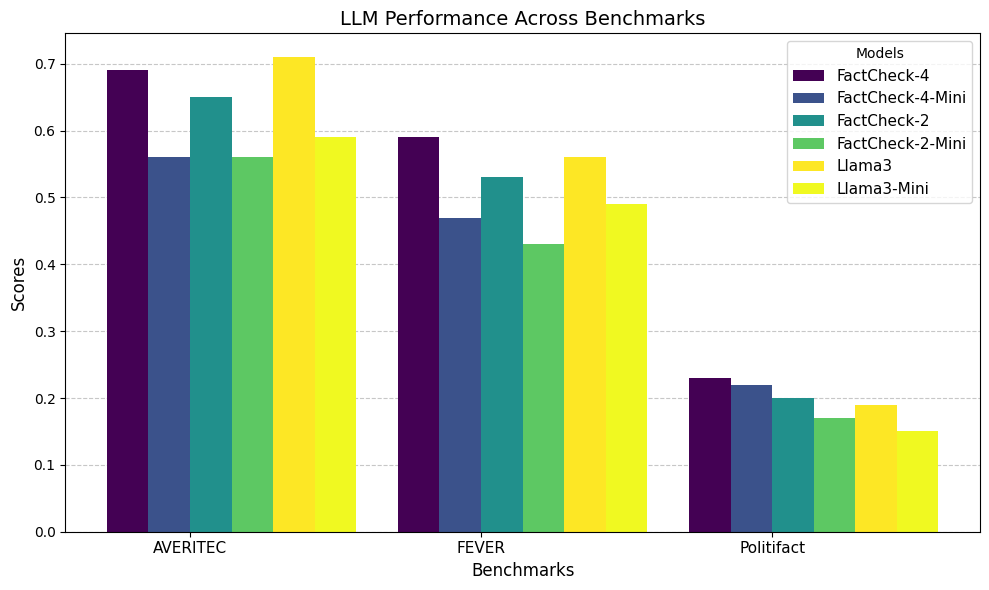

In [24]:
# Data Preparation
group_spacing = 0.4  # Spacing between benchmark groups
x = np.arange(len(benchmarks)) * (1 + group_spacing)  # Adjusted x-axis positions for spacing
width = 0.2  # Width of each bar
colors = ['#440154', '#3b528b', '#21908c', '#5dc863', '#fde725', '#f0f921'] #colors per model

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for i, model in enumerate(models):
    model_scores = [results[benchmark][i] for benchmark in benchmarks]
    ax.bar(x + i * width, model_scores, width, label=model, color=colors[i])

# Add horizontal grid lines
ax.yaxis.grid(True, linestyle='--', alpha=0.7)  # Dashed lines with transparency
ax.set_axisbelow(True)  # Ensure grid lines are behind bars
    
# Customization
ax.set_xlabel('Benchmarks', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('LLM Performance Across Benchmarks', fontsize=14)
ax.set_xticks(x + width * 1.5)  # Align xticks to the middle of the groups
ax.set_xticklabels(benchmarks, fontsize=11)
ax.legend(title="Models", fontsize=11)

# Display Chart
plt.tight_layout()
plt.show()